<a href="https://colab.research.google.com/github/minh071289/MachineLearning/blob/main/23020407_cifar100_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
Your task is to create a neural network to classify images in the cifar100 dataset.
- You have to write the code from scratch, train the model and test the accuracy on the test set.
- You are not allowed to use pretrained models to do this task.
- You have to submit the .ipynb files with the execution result.

# Grading criteria
- You are graded on the test set accuracy:
  - Test accuracy = 0.50, Grade = 6
  - Test accuracy = 0.55, Grade = 7
  - Test accuracy = 0.60, Grade = 8
  - Test accuracy = 0.65, Grade = 9
  - Test accuracy = 0.70, Grade = 10
- Plagiarism will automatically results in 0 mark.


In [2]:
# DO NOT MODIFY THIS CODE
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
from tqdm.auto import tqdm, trange


In [3]:
# You are free to use any other kind of transforms here
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409],
                         std=[0.2673, 0.2564, 0.2762])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409],
                         std=[0.2673, 0.2564, 0.2762])
])
cifar100_train = datasets.CIFAR100('./data',
                             train=True,
                             download=True,
                             transform=transform_train)

cifar100_test = datasets.CIFAR100('./data',
                              train=False,
                              download=True,
                              transform=transform_test)

100%|██████████| 169M/169M [00:03<00:00, 47.9MB/s]


In [4]:
print(len(cifar100_train))
print(len(cifar100_test))

50000
10000


In [5]:
# DO NOT MODIFY THIS CODE
def evaluate(net: nn.Module,
             data) -> float:
  """
  Evaluates the neural network on the given data.
  @param net: the neural network to evaluate
  @param data: the data to evaluate on
  @return: the accuracy of the neural network on the given data
  """
  data_loader = torch.utils.data.DataLoader(data,
                                            batch_size=100,
                                            shuffle=False)

  correct = 0
  total = 0
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  net.to(device)
  net.eval()
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      inputs, targets = inputs.to(device), targets.to(device)
      pred_target = net(inputs).argmax(dim=1)
      correct += (pred_target == targets).sum().item()
      total += targets.size(0)

  return correct / total

In [10]:
"""
def train(train_data,
          net,
          **kwargs) -> Tuple[nn.Module, list[float], list[float]]:
  Trains the neural network on the given data.
  @param train_data: the data to train on
  @param net: the neural network to train
  @param kwargs: the keyword arguments such as learning rate, batch size, etc.
  @return: the trained neural network, train losses, and train accuracies

  # NOTE: YOU ARE NOT ALLOWED TO PASS test_data AS A PARAMERTER TO THIS METHOD
  train_losses = []
  train_accuracies = []
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  net.to(device)
  net.train()

  # YOUR CODE HERE
  # Hints: you are free to normalize the training data, invent new architecture,
  # apply early stopping, regularization, or any other kinds of tricks here.

  # Example code
  train_loader = torch.utils.data.DataLoader(train_data,
                                             batch_size=kwargs['batch_size'],
                                             shuffle=True)
  optimizer = opt.Adam(net.parameters(), lr=kwargs['lr'])
  criterion = nn.CrossEntropyLoss()
  pbar = trange(kwargs['epochs'])
  for epoch in pbar:
    train_loss = 0
    val_loss = 0
    for batch_idx, (inputs, targets) in enumerate(tqdm(train_loader)):
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      pred_targets = net(inputs)
      loss = criterion(pred_targets, targets)
      loss.backward()
      optimizer.step()
      train_losses.append(loss.item())
    train_accuracy = evaluate(net, train_data)
    train_accuracies.append(train_accuracy)
    pbar.set_description(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f}")

  return net, train_losses, train_accuracies
"""

'\ndef train(train_data,\n          net,\n          **kwargs) -> Tuple[nn.Module, list[float], list[float]]:\n  Trains the neural network on the given data.\n  @param train_data: the data to train on\n  @param net: the neural network to train\n  @param kwargs: the keyword arguments such as learning rate, batch size, etc.\n  @return: the trained neural network, train losses, and train accuracies\n  \n  # NOTE: YOU ARE NOT ALLOWED TO PASS test_data AS A PARAMERTER TO THIS METHOD\n  train_losses = []\n  train_accuracies = []\n  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n  net.to(device)\n  net.train()\n\n  # YOUR CODE HERE\n  # Hints: you are free to normalize the training data, invent new architecture,\n  # apply early stopping, regularization, or any other kinds of tricks here.\n\n  # Example code\n  train_loader = torch.utils.data.DataLoader(train_data,\n                                             batch_size=kwargs[\'batch_size\'],\n                        

In [11]:
class CIFAR100Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 100)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        return self.fc_layers(x)

In [19]:
# ===================== 1. Define SimpleNet ===================== #
class SimpleNet(nn.Module):
    def __init__(self, num_classes=100, dropout_rate=0.3):
        super(SimpleNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [6]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        self.block = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, growth_rate, kernel_size=3, padding=1, bias=False)
        )

    def forward(self, x):
        out = self.block(x)
        return torch.cat([x, out], 1)

class DenseBlock(nn.Module):
    def __init__(self, num_layers, in_channels, growth_rate):
        super().__init__()
        layers = []
        for i in range(num_layers):
            layers.append(ConvBlock(in_channels + i * growth_rate, growth_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.transition = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.AvgPool2d(2)
        )

    def forward(self, x):
        return self.transition(x)

class TinyDenseNet(nn.Module):
    def __init__(self, growth_rate=12, num_classes=100):
        super().__init__()
        num_init_features = 24

        self.init_conv = nn.Conv2d(3, num_init_features, kernel_size=3, padding=1, bias=False)

        self.block1 = DenseBlock(num_layers=4, in_channels=num_init_features, growth_rate=growth_rate)
        in_channels = num_init_features + 4 * growth_rate
        self.trans1 = TransitionLayer(in_channels, in_channels // 2)

        self.block2 = DenseBlock(num_layers=4, in_channels=in_channels // 2, growth_rate=growth_rate)
        in_channels = in_channels // 2 + 4 * growth_rate
        self.trans2 = TransitionLayer(in_channels, in_channels // 2)

        self.block3 = DenseBlock(num_layers=4, in_channels=in_channels // 2, growth_rate=growth_rate)
        in_channels = in_channels // 2 + 4 * growth_rate

        self.classifier = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(in_channels, num_classes)
        )

    def forward(self, x):
        x = self.init_conv(x)
        x = self.trans1(self.block1(x))
        x = self.trans2(self.block2(x))
        x = self.block3(x)
        x = self.classifier(x)
        return x


In [7]:
def train(train_data, net, **kwargs) -> Tuple[nn.Module, list[float], list[float]]:
    train_losses, train_accuracies = [], []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    net.train()

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=kwargs['batch_size'], shuffle=True)
    optimizer = opt.Adam(net.parameters(), lr=kwargs['lr'], weight_decay=1e-4)
    scheduler = opt.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    for epoch in trange(kwargs['epochs']):
        epoch_loss = 0
        for inputs, targets in tqdm(train_loader, leave=False):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            output = net(inputs)
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        scheduler.step()

        avg_loss = epoch_loss / len(train_loader)
        train_acc = evaluate(net, train_data)
        train_losses.append(avg_loss)
        train_accuracies.append(train_acc)
        print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_acc:.4f}")

    return net, train_losses, train_accuracies

In [13]:
net = CIFAR100Net()
lr = 0.001
batch_size = 128
epochs = 100

net, train_losses, train_accuracies = train(train_data=cifar100_train,
                                            net=net,
                                            lr=lr,
                                            batch_size=batch_size,
                                            epochs=epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1: Loss=4.2229, Train Acc=0.1078


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2: Loss=3.5775, Train Acc=0.1895


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3: Loss=3.1397, Train Acc=0.2644


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4: Loss=2.7941, Train Acc=0.3371


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5: Loss=2.5044, Train Acc=0.3815


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6: Loss=2.2907, Train Acc=0.4321


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7: Loss=2.1150, Train Acc=0.4591


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8: Loss=1.9559, Train Acc=0.4951


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9: Loss=1.8254, Train Acc=0.5179


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10: Loss=1.7047, Train Acc=0.5574


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11: Loss=1.6211, Train Acc=0.5768


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12: Loss=1.5434, Train Acc=0.5967


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13: Loss=1.4648, Train Acc=0.6159


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14: Loss=1.3953, Train Acc=0.6326


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15: Loss=1.3340, Train Acc=0.6460


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16: Loss=1.2837, Train Acc=0.6627


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17: Loss=1.2246, Train Acc=0.6698


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18: Loss=1.1741, Train Acc=0.6709


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19: Loss=1.1320, Train Acc=0.6970


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20: Loss=1.0877, Train Acc=0.7120


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21: Loss=1.0453, Train Acc=0.7165


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22: Loss=1.0180, Train Acc=0.7346


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23: Loss=0.9736, Train Acc=0.7473


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24: Loss=0.9374, Train Acc=0.7435


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25: Loss=0.9139, Train Acc=0.7576


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26: Loss=0.8696, Train Acc=0.7552


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27: Loss=0.8595, Train Acc=0.7759


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28: Loss=0.8267, Train Acc=0.7817


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29: Loss=0.8067, Train Acc=0.7803


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30: Loss=0.7815, Train Acc=0.7825


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 31: Loss=0.5888, Train Acc=0.8458


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 32: Loss=0.5321, Train Acc=0.8603


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 33: Loss=0.5053, Train Acc=0.8566


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 34: Loss=0.4826, Train Acc=0.8700


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 35: Loss=0.4600, Train Acc=0.8692


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 36: Loss=0.4386, Train Acc=0.8806


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 37: Loss=0.4200, Train Acc=0.8800


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 38: Loss=0.4046, Train Acc=0.8798


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 39: Loss=0.3932, Train Acc=0.8908


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 40: Loss=0.3775, Train Acc=0.9010


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 41: Loss=0.3677, Train Acc=0.8962


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 42: Loss=0.3513, Train Acc=0.8985


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 43: Loss=0.3440, Train Acc=0.8985


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 44: Loss=0.3324, Train Acc=0.9067


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 45: Loss=0.3208, Train Acc=0.9074


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 46: Loss=0.3100, Train Acc=0.9132


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 47: Loss=0.3061, Train Acc=0.9150


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 48: Loss=0.2919, Train Acc=0.9159


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 49: Loss=0.2887, Train Acc=0.9178


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 50: Loss=0.2865, Train Acc=0.9166


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 51: Loss=0.2792, Train Acc=0.9207


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 52: Loss=0.2714, Train Acc=0.9263


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 53: Loss=0.2626, Train Acc=0.9219


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 54: Loss=0.2621, Train Acc=0.9234


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 55: Loss=0.2564, Train Acc=0.9228


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 56: Loss=0.2530, Train Acc=0.9298


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 57: Loss=0.2450, Train Acc=0.9289


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 58: Loss=0.2488, Train Acc=0.9135


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 59: Loss=0.2407, Train Acc=0.9268


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 60: Loss=0.2391, Train Acc=0.9317


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 61: Loss=0.1534, Train Acc=0.9599


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 62: Loss=0.1293, Train Acc=0.9630


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 63: Loss=0.1222, Train Acc=0.9620


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 64: Loss=0.1206, Train Acc=0.9631


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 65: Loss=0.1134, Train Acc=0.9659


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 66: Loss=0.1147, Train Acc=0.9669


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 67: Loss=0.1129, Train Acc=0.9687


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 68: Loss=0.1166, Train Acc=0.9673


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 69: Loss=0.1121, Train Acc=0.9696


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 70: Loss=0.1053, Train Acc=0.9693


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 71: Loss=0.1009, Train Acc=0.9652


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 72: Loss=0.1112, Train Acc=0.9685


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 73: Loss=0.0985, Train Acc=0.9692


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 74: Loss=0.1012, Train Acc=0.9721


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 75: Loss=0.1015, Train Acc=0.9734


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 76: Loss=0.0996, Train Acc=0.9699


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 77: Loss=0.0995, Train Acc=0.9719


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 78: Loss=0.0976, Train Acc=0.9721


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 79: Loss=0.0947, Train Acc=0.9697


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 80: Loss=0.0981, Train Acc=0.9726


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 81: Loss=0.0913, Train Acc=0.9725


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 82: Loss=0.0939, Train Acc=0.9722


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 83: Loss=0.0904, Train Acc=0.9718


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 84: Loss=0.0924, Train Acc=0.9687


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 85: Loss=0.0931, Train Acc=0.9726


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 86: Loss=0.0937, Train Acc=0.9738


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 87: Loss=0.0894, Train Acc=0.9747


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 88: Loss=0.0919, Train Acc=0.9702


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 89: Loss=0.0916, Train Acc=0.9721


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 90: Loss=0.0921, Train Acc=0.9715


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 91: Loss=0.0587, Train Acc=0.9848


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 92: Loss=0.0504, Train Acc=0.9865


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 93: Loss=0.0473, Train Acc=0.9859


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 94: Loss=0.0466, Train Acc=0.9876


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 95: Loss=0.0469, Train Acc=0.9870


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 96: Loss=0.0461, Train Acc=0.9875


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 97: Loss=0.0441, Train Acc=0.9862


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 98: Loss=0.0446, Train Acc=0.9886


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 99: Loss=0.0436, Train Acc=0.9880


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 100: Loss=0.0433, Train Acc=0.9894


In [20]:
net = SimpleNet()
lr = 0.001
batch_size = 128
epochs = 100

net, train_losses, train_accuracies = train(train_data=cifar100_train,
                                            net=net,
                                            lr=lr,
                                            batch_size=batch_size,
                                            epochs=epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1: Loss=4.2470, Train Acc=0.1003


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2: Loss=3.6695, Train Acc=0.1533


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3: Loss=3.3605, Train Acc=0.2098


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4: Loss=3.1386, Train Acc=0.2422


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5: Loss=2.9604, Train Acc=0.2707


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6: Loss=2.8100, Train Acc=0.3013


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7: Loss=2.6878, Train Acc=0.3248


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8: Loss=2.5906, Train Acc=0.3399


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9: Loss=2.5198, Train Acc=0.3613


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10: Loss=2.4377, Train Acc=0.3676


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11: Loss=2.3726, Train Acc=0.3828


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12: Loss=2.3151, Train Acc=0.3902


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13: Loss=2.2688, Train Acc=0.4137


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14: Loss=2.2144, Train Acc=0.4152


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15: Loss=2.1716, Train Acc=0.4271


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16: Loss=2.1222, Train Acc=0.4389


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17: Loss=2.0748, Train Acc=0.4472


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18: Loss=2.0460, Train Acc=0.4475


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19: Loss=2.0073, Train Acc=0.4667


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20: Loss=1.9592, Train Acc=0.4768


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21: Loss=1.9078, Train Acc=0.4905


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22: Loss=1.8646, Train Acc=0.5009


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23: Loss=1.8245, Train Acc=0.5165


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24: Loss=1.7903, Train Acc=0.5185


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25: Loss=1.7575, Train Acc=0.5137


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26: Loss=1.7370, Train Acc=0.5377


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27: Loss=1.7005, Train Acc=0.5450


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28: Loss=1.6745, Train Acc=0.5400


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29: Loss=1.6484, Train Acc=0.5590


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30: Loss=1.6225, Train Acc=0.5667


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 31: Loss=1.5041, Train Acc=0.5930


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 32: Loss=1.4639, Train Acc=0.5936


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 33: Loss=1.4398, Train Acc=0.5961


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 34: Loss=1.4279, Train Acc=0.6082


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 35: Loss=1.4144, Train Acc=0.6136


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 36: Loss=1.3887, Train Acc=0.6132


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 37: Loss=1.3735, Train Acc=0.6246


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 38: Loss=1.3608, Train Acc=0.6250


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 39: Loss=1.3385, Train Acc=0.6291


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 40: Loss=1.3176, Train Acc=0.6410


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 41: Loss=1.3104, Train Acc=0.6378


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 42: Loss=1.2905, Train Acc=0.6440


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 43: Loss=1.2737, Train Acc=0.6450


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 44: Loss=1.2532, Train Acc=0.6475


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 45: Loss=1.2357, Train Acc=0.6501


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 46: Loss=1.2274, Train Acc=0.6583


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 47: Loss=1.2118, Train Acc=0.6601


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 48: Loss=1.1982, Train Acc=0.6616


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 49: Loss=1.1824, Train Acc=0.6711


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 50: Loss=1.1681, Train Acc=0.6774


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 51: Loss=1.1519, Train Acc=0.6792


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 52: Loss=1.1338, Train Acc=0.6820


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 53: Loss=1.1297, Train Acc=0.6866


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 54: Loss=1.1142, Train Acc=0.6894


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 55: Loss=1.1099, Train Acc=0.6935


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 56: Loss=1.0914, Train Acc=0.6938


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 57: Loss=1.0775, Train Acc=0.7059


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 58: Loss=1.0657, Train Acc=0.6943


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 59: Loss=1.0622, Train Acc=0.7028


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 60: Loss=1.0494, Train Acc=0.7075


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 61: Loss=0.9584, Train Acc=0.7291


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 62: Loss=0.9468, Train Acc=0.7295


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 63: Loss=0.9291, Train Acc=0.7359


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 64: Loss=0.9168, Train Acc=0.7417


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 65: Loss=0.9127, Train Acc=0.7445


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 66: Loss=0.9026, Train Acc=0.7464


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 67: Loss=0.9023, Train Acc=0.7477


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 68: Loss=0.8836, Train Acc=0.7500


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 69: Loss=0.8748, Train Acc=0.7518


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 70: Loss=0.8677, Train Acc=0.7527


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 71: Loss=0.8616, Train Acc=0.7559


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 72: Loss=0.8498, Train Acc=0.7599


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 73: Loss=0.8366, Train Acc=0.7618


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 74: Loss=0.8326, Train Acc=0.7616


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 75: Loss=0.8194, Train Acc=0.7679


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 76: Loss=0.8175, Train Acc=0.7709


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 77: Loss=0.8104, Train Acc=0.7719


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 78: Loss=0.8000, Train Acc=0.7733


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 79: Loss=0.7886, Train Acc=0.7775


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 80: Loss=0.7803, Train Acc=0.7756


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 81: Loss=0.7777, Train Acc=0.7766


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 82: Loss=0.7763, Train Acc=0.7815


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 83: Loss=0.7627, Train Acc=0.7827


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 84: Loss=0.7497, Train Acc=0.7818


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 85: Loss=0.7455, Train Acc=0.7888


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 86: Loss=0.7402, Train Acc=0.7849


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 87: Loss=0.7302, Train Acc=0.7919


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 88: Loss=0.7295, Train Acc=0.7906


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 89: Loss=0.7213, Train Acc=0.7903


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 90: Loss=0.7075, Train Acc=0.7926


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 91: Loss=0.6590, Train Acc=0.8121


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 92: Loss=0.6440, Train Acc=0.8172


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 93: Loss=0.6355, Train Acc=0.8159


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 94: Loss=0.6267, Train Acc=0.8206


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 95: Loss=0.6265, Train Acc=0.8170


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 96: Loss=0.6223, Train Acc=0.8215


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 97: Loss=0.6173, Train Acc=0.8244


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 98: Loss=0.6021, Train Acc=0.8221


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 99: Loss=0.6077, Train Acc=0.8260


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 100: Loss=0.5935, Train Acc=0.8220


In [9]:
net = TinyDenseNet()
lr = 0.001
batch_size = 128
epochs = 100

net, train_losses, train_accuracies = train(train_data=cifar100_train,
                                            net=net,
                                            lr=lr,
                                            batch_size=batch_size,
                                            epochs=epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

KeyboardInterrupt: 

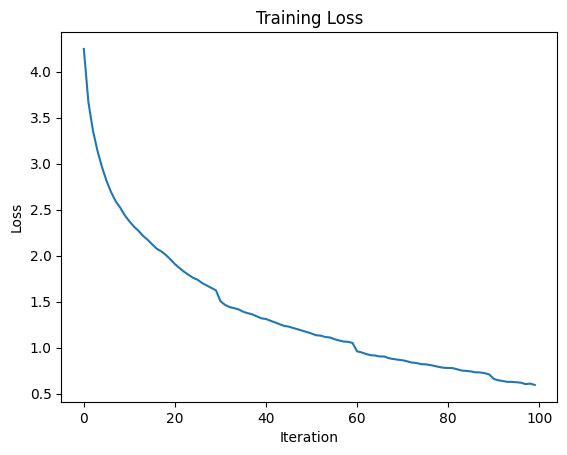

In [21]:
# DO NOT MODIFY THIS CODE
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

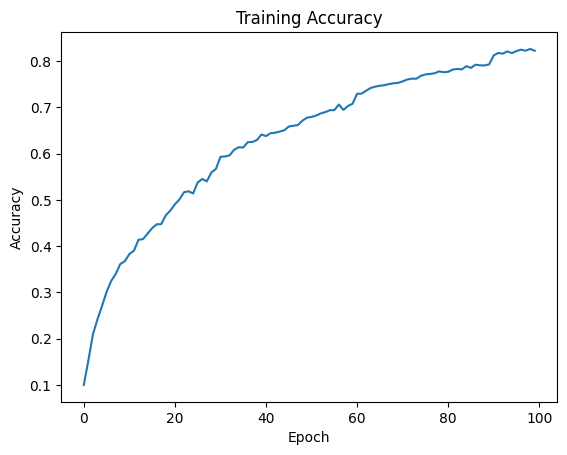

In [22]:
# DO NOT MODIFY THIS CODE
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# DO NOT MODIFY THIS CODE
test_accuracy = evaluate(net, cifar100_test)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.6
